<a href="https://colab.research.google.com/github/sudhajagatheesh/ML/blob/master/assignment2_25637_96788.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
# loading datasets
annual_report_df = pd.read_json('AnnualReport.json')
apartment_df = pd.read_json('Apartment.json')
housing_association_df = pd.read_json('HousingAssociation.json')

In [ ]:
# Merge Apartment data with Housing Association data
apartment_full_df = pd.merge(apartment_df, housing_association_df, left_on='housing_association_org_number', right_on='org_number', how='left')
apartment_full_df.head()

,id,sell_date,sell_price,rooms,legal_district,postcode,locality,street_name,object_type,street_address,...,has_balcony,has_fireplace,has_patio,is_new_construction,width,height,housing_association_org_number,org_number,name,construction_year
0,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,...,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,716418-1401,BRF Ingemar 3,1886.0
1,00015e9ff97f3e12967d8551251c474a,2015-02-12,2600000.0,4.0,Hässelby-Vällingby,16561,Hässelby,Medsolsbacken,Apartment,Medsolsbacken 17,...,NaN,NaN,NaN,NaN,NaN,NaN,769607-9966,769607-9966,"BRF Gästsalen 1, 2 & 3",NaN
2,00019f77d6a0491134d07b85e509acd7,2020-11-13,5250000.0,3.0,Kungsholmen,11259,Innanför tullarna,Rålambsvägen,Apartment,Rålambsvägen 21,...,NaN,NaN,NaN,NaN,NaN,NaN,769604-9803,769604-9803,BRF Signallyktan 1,1944.0
3,00020bc71344a6749b66097b33d4e0a1,2015-03-26,5900000.0,3.0,Gärdet,11553,Innanför tullarna,Värtavägen,Apartment,Värtavägen 23,...,NaN,NaN,NaN,NaN,NaN,NaN,716419-3067,716419-3067,BRF Röda Rosen 6,1934.0
4,0002b768f2cfd98f1768a875ef773e2b,2014-01-16,1300000.0,2.0,Spånga-Tensta,16361,Kista/Hässelby/Vällingby/Spånga,Holmingegränd,Apartment,Holmingegränd 13,...,NaN,NaN,NaN,NaN,NaN,NaN,702002-1908,702002-1908,Riksbyggen BRF Stockholmshus 24,1968.0


In [ ]:
# Print unique values in 'association_tax_liability' to understand what non-numeric values it contains
print(annual_report_df['association_tax_liability'].unique())

['lowered_tax_liability' 'other' None 'standard_tax_liability']


In [ ]:
# Convert the 'association_tax_liability' column to numeric, setting errors='coerce' to handle non-numeric data
annual_report_df['association_tax_liability'] = pd.to_numeric(annual_report_df['association_tax_liability'], errors='coerce')

# You may need to do this for other columns as well depending on their content
columns_to_convert = ['long_term_debt_other', 'long_term_real_estate_debt', 'total_living_area', 'total_loan', 'savings']
for col in columns_to_convert:
    annual_report_df[col] = pd.to_numeric(annual_report_df[col], errors='coerce')


In [ ]:
# Aggregate Annual Reports by Housing Association again
aggregated_annual_reports = annual_report_df.groupby('org_number').agg({
    'association_tax_liability': 'mean',
    'long_term_debt_other': 'mean',
    'long_term_real_estate_debt': 'mean',
    'number_of_rental_units': 'sum',
    'number_of_units': 'sum',
    'total_commercial_area': 'sum',
    'total_living_area': 'mean',
    'total_loan': 'mean',
    'total_plot_area': 'sum',
    'total_rental_area': 'sum',
    'savings': 'mean',
    'fiscal_year' : 'max',
    'housing_coop_id': 'first',
    'plot_is_leased': 'max'
}).reset_index()

# Merge the result with Aggregated Annual Reports
final_df = pd.merge(apartment_full_df, aggregated_annual_reports, left_on='housing_association_org_number', right_on='org_number', how='left')

# Check the final merged DataFrame
print("\nFinal Merged DataFrame:")
print(final_df.head())



Final Merged DataFrame:
                                 id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district  postcode                         locality  \
0            Vasastan     11349                Innanför tullarna   
1  Hässelby-Vällingby     16561                         Hässelby   
2         Kungsholmen     11259                Innanför tullarna   
3              Gärdet     11553                Innanför tullarna   
4       Spånga-Tensta     16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... number_of_units  \
0      Frejgatan   Apartment      Frejgatan 10  ...            84.0   
1  

In [ ]:

# Assuming final_df is your DataFrame from which you want to remove duplicate columns
def remove_duplicate_columns(df):
    # Create an empty dictionary to store the comparison of columns
    duplicates = {}

    # Iterate over all columns in DataFrame
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[i + 1:]):  # Compare with subsequent columns
            # If columns have the same content
            if df[col1].equals(df[col2]):
                # If col2 is not already identified as a duplicate of some other column
                if col2 not in duplicates:
                    duplicates[col2] = col1  # Map col2 as a duplicate of col1

    # Drop duplicate columns from the DataFrame
    df = df.drop(columns=duplicates.keys())
    return df

# Remove duplicate columns
final_df = remove_duplicate_columns(final_df)

# Print the DataFrame to confirm removal of duplicates
print("DataFrame after removing duplicate columns:")
print(final_df.head())
final_df.to_excel('final_condensed_data.xlsx', index=False, engine='openpyxl')


DataFrame after removing duplicate columns:
                                 id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district  postcode                         locality  \
0            Vasastan     11349                Innanför tullarna   
1  Hässelby-Vällingby     16561                         Hässelby   
2         Kungsholmen     11259                Innanför tullarna   
3              Gärdet     11553                Innanför tullarna   
4       Spånga-Tensta     16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... number_of_units  \
0      Frejgatan   Apartment      Frejgatan 10  ...    

In [ ]:
print("Number of rows before removal:", final_df.shape[0])

# Remove rows where 'object_type' is either 'Twin House' or 'Rowhouse'
final_df = final_df[~final_df['object_type'].isin(['Twin House', 'Rowhouse'])]

# Print the number of rows after removal to confirm rows were deleted
print("Number of rows after removal:", final_df.shape[0])

Number of rows before removal: 178962
Number of rows after removal: 178951


In [ ]:
df_with_sell_price = final_df[final_df['sell_price'] > 0]

# Dataset where sell_price is zero or NaN (assuming sell_price has been properly cleaned and is numeric)
df_without_sell_price = final_df[(final_df['sell_price'] == 0) | (final_df['sell_price'].isna())]

# Optionally, you can print the first few rows to verify
print("Dataset With Sell Price:")
print(df_with_sell_price.head())
df_with_sell_price.to_json('df_with_sell_price.json', orient='records', lines=True)
print("\nDataset Without Sell Price:")
print(df_without_sell_price.head())
df_without_sell_price.to_json('df_without_sell_price.json', orient='records', lines=True)

Dataset With Sell Price:
                                 id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district postcode                         locality  \
0            Vasastan    11349                Innanför tullarna   
1  Hässelby-Vällingby    16561                         Hässelby   
2         Kungsholmen    11259                Innanför tullarna   
3              Gärdet    11553                Innanför tullarna   
4       Spånga-Tensta    16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... total_plot_area  \
0      Frejgatan   Apartment      Frejgatan 10  ...             0.0   
1  Medsol

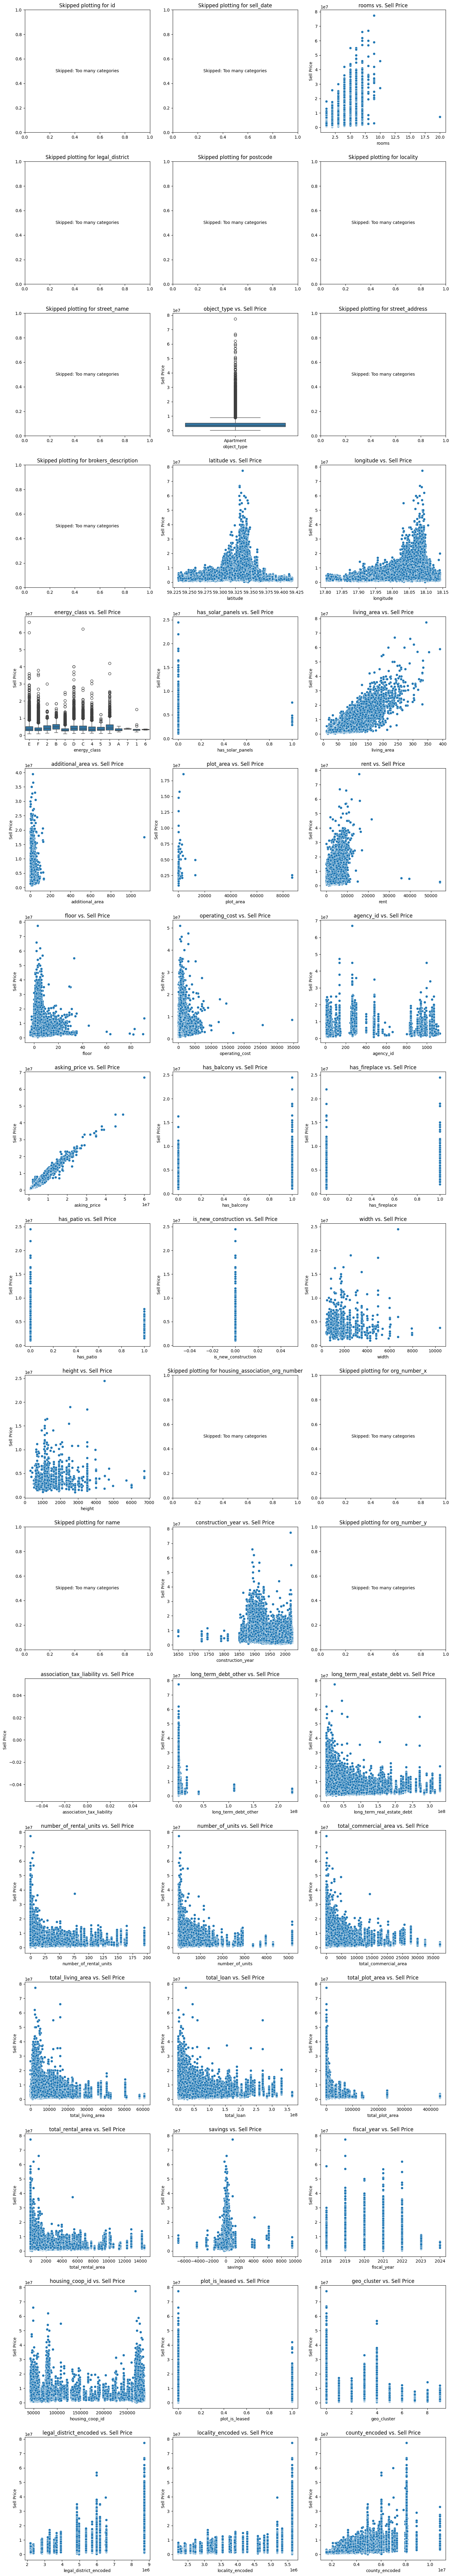

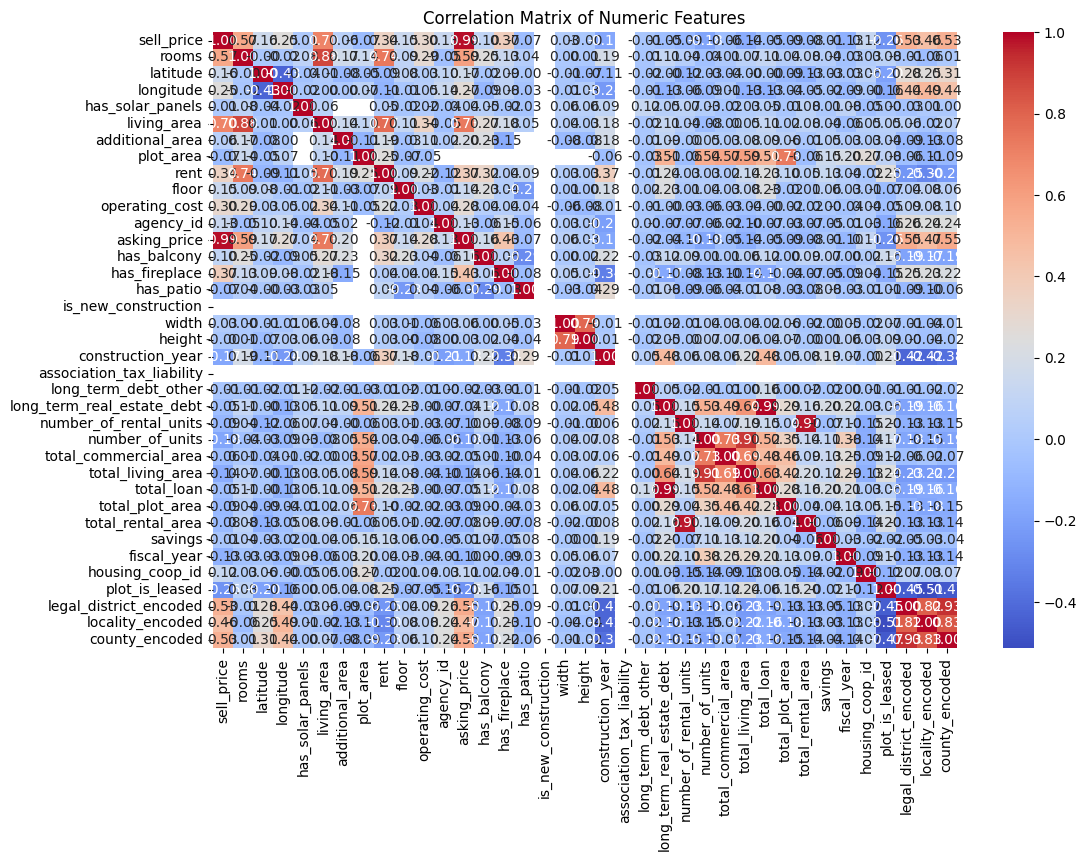

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_with_sell_price is your DataFrame
relevant_columns = [col for col in df_with_sell_price.columns if col != 'sell_price' and df_with_sell_price[col].dtype != 'bool']
num_columns = len(relevant_columns)

# Dynamic adjustment of the grid layout for subplots
num_rows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows), squeeze=False)
axs = axs.flatten()  # Flatten the array to simplify indexing

# Iterate over each relevant column to create plots
for i, column in enumerate(relevant_columns):
    if i >= len(axs):  # If there are more columns than initially estimated subplots
        break  # Avoid indexing errors on axs
    # Determine if the column is numeric
    if pd.api.types.is_numeric_dtype(df_with_sell_price[column]):
        # Create scatter plot for numeric columns
        sns.scatterplot(data=df_with_sell_price, x=column, y='sell_price', ax=axs[i])
    else:
        # Handle categorical data with fewer than 20 unique values
        if df_with_sell_price[column].nunique() < 20:
            sns.boxplot(x=column, y='sell_price', data=df_with_sell_price, ax=axs[i])
        else:
            # Indicate skipping the plot for high cardinality
            axs[i].text(0.5, 0.5, 'Skipped: Too many categories', ha='center', va='center')
            axs[i].set_title(f'Skipped plotting for {column}')
            continue  # Skip further formatting for this subplot
    axs[i].set_title(f'{column} vs. Sell Price')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Sell Price')

# Hide any unused subplots that may exist if the number of plots is less than the number of subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Correlation matrix of numeric features
correlation_matrix = df_with_sell_price.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
# Select only numeric columns for correlation calculations
numeric_df = df_with_sell_price.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation coefficients
pearson_corr = numeric_df.corr(method='pearson')['sell_price'].sort_values(ascending=False)

# Calculate Spearman correlation coefficients for ordinal or non-linear relationships
spearman_corr = numeric_df.corr(method='spearman')['sell_price'].sort_values(ascending=False)

# Print the results
print("Pearson Correlation Coefficients:\n", pearson_corr)
print("\nSpearman Correlation Coefficients:\n", spearman_corr)

Pearson Correlation Coefficients:
 sell_price                    1.000000
asking_price                  0.985782
living_area                   0.696228
rooms                         0.567383
county_encoded                0.531493
legal_district_encoded        0.525996
locality_encoded              0.456630
has_fireplace                 0.369196
rent                          0.341299
operating_cost                0.304784
longitude                     0.250971
latitude                      0.156400
floor                         0.147601
agency_id                     0.131098
housing_coop_id               0.121324
has_balcony                   0.097485
additional_area               0.056286
width                         0.030401
has_solar_panels              0.010659
height                       -0.001489
long_term_debt_other         -0.012593
savings                      -0.013211
long_term_real_estate_debt   -0.052667
total_loan                   -0.053423
total_commercial_area        

In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming df_with_sell_price is already defined and loaded

# Select only numeric columns for correlation calculations
numeric_df = df_with_sell_price.select_dtypes(include=['float64', 'int64'])

# Remove inf/-inf, replace with NaN
numeric_df = numeric_df.replace([float('inf'), float('-inf')], pd.NA)

# Initialize dictionaries to store correlations and p-values
pearson_corr = {}
pearson_p_values = {}
spearman_corr = {}
spearman_p_values = {}

# Calculate Pearson and Spearman correlations and p-values for each numeric column against 'sell_price'
for column in numeric_df.columns:
    if column != 'sell_price':  # Skip comparing 'sell_price' with itself
        # Drop NaN values specifically in the current column to keep maximum data
        valid_data = numeric_df.dropna(subset=[column, 'sell_price'])

        # Check if data has variability and enough points
        if valid_data[column].std() != 0 and len(valid_data[column]) > 1:
            # Pearson correlation
            corr, p_value = stats.pearsonr(valid_data[column], valid_data['sell_price'])
            pearson_corr[column] = corr
            pearson_p_values[column] = p_value

            # Spearman correlation
            corr, p_value = stats.spearmanr(valid_data[column], valid_data['sell_price'])
            spearman_corr[column] = corr
            spearman_p_values[column] = p_value
        else:
            # Handle cases where there is no variability or insufficient data
            pearson_corr[column] = None
            pearson_p_values[column] = None
            spearman_corr[column] = None
            spearman_p_values[column] = None

# Print Pearson results
print("Pearson Correlation Coefficients and P-values:")
for col in pearson_corr:
    print(f"{col}: Correlation = {pearson_corr[col]}, P-value = {pearson_p_values[col]}")

# Print Spearman results
print("\nSpearman Correlation Coefficients and P-values:")
for col in spearman_corr:
    print(f"{col}: Correlation = {spearman_corr[col]}, P-value = {spearman_p_values[col]}")


Pearson Correlation Coefficients and P-values:
rooms: Correlation = 0.5673832413310834, P-value = 0.0
latitude: Correlation = 0.15640046785069034, P-value = 0.0
longitude: Correlation = 0.2509707931805352, P-value = 0.0
has_solar_panels: Correlation = 0.010659374216603514, P-value = 0.7400878732908515
living_area: Correlation = 0.6962279928275019, P-value = 0.0
additional_area: Correlation = 0.05628556830591532, P-value = 0.0023331675472788075
plot_area: Correlation = -0.07235595637539237, P-value = 0.4422123505584501
rent: Correlation = 0.34129881117805144, P-value = 0.0
floor: Correlation = 0.1476012154872905, P-value = 0.0
operating_cost: Correlation = 0.30478359278453737, P-value = 0.0
agency_id: Correlation = 0.13109779395149984, P-value = 1.5638897525260342e-73
asking_price: Correlation = 0.985781639310317, P-value = 0.0
has_balcony: Correlation = 0.09748532326743013, P-value = 0.0015796542861389027
has_fireplace: Correlation = 0.36919649294793877, P-value = 3.45494625176092e-35


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming df_with_sell_price is your DataFrame
# Select only numeric columns for correlation calculations
numeric_df = df_with_sell_price.select_dtypes(include=['float64', 'int64'])

# Remove inf/-inf, replace with NaN
numeric_df = numeric_df.replace([float('inf'), float('-inf')], pd.NA)

# Initialize dictionaries to store correlations and p-values
pearson_corr = {}
pearson_p_values = {}
spearman_corr = {}
spearman_p_values = {}

# Define significance level
alpha = 0.05

# Calculate Pearson and Spearman correlations and p-values for each numeric column against 'sell_price'
for column in numeric_df.columns:
    if column != 'sell_price':  # Skip comparing 'sell_price' with itself
        # Drop NaN values specifically in the current column to keep maximum data
        valid_data = numeric_df.dropna(subset=[column, 'sell_price'])

        # Check if data has variability and enough points
        if valid_data[column].std() != 0 and len(valid_data[column]) > 1:
            # Pearson correlation
            corr, p_value = stats.pearsonr(valid_data[column], valid_data['sell_price'])
            if p_value < alpha:
                pearson_corr[column] = corr
                pearson_p_values[column] = p_value

            # Spearman correlation
            corr, p_value = stats.spearmanr(valid_data[column], valid_data['sell_price'])
            if p_value < alpha:
                spearman_corr[column] = corr
                spearman_p_values[column] = p_value

# Print Pearson results for significant correlations
print("Significant Pearson Correlation Coefficients and P-values:")
for col in pearson_corr:
    print(f"{col}: Correlation = {pearson_corr[col]:.3f}, P-value = {pearson_p_values[col]:.4f}")

# Print Spearman results for significant correlations
print("\nSignificant Spearman Correlation Coefficients and P-values:")
for col in spearman_corr:
    print(f"{col}: Correlation = {spearman_corr[col]:.3f}, P-value = {spearman_p_values[col]:.4f}")


Significant Pearson Correlation Coefficients and P-values:
rooms: Correlation = 0.567, P-value = 0.0000
latitude: Correlation = 0.156, P-value = 0.0000
longitude: Correlation = 0.251, P-value = 0.0000
living_area: Correlation = 0.696, P-value = 0.0000
additional_area: Correlation = 0.056, P-value = 0.0023
rent: Correlation = 0.341, P-value = 0.0000
floor: Correlation = 0.148, P-value = 0.0000
operating_cost: Correlation = 0.305, P-value = 0.0000
agency_id: Correlation = 0.131, P-value = 0.0000
asking_price: Correlation = 0.986, P-value = 0.0000
has_balcony: Correlation = 0.097, P-value = 0.0016
has_fireplace: Correlation = 0.369, P-value = 0.0000
has_patio: Correlation = -0.065, P-value = 0.0351
construction_year: Correlation = -0.172, P-value = 0.0000
long_term_debt_other: Correlation = -0.013, P-value = 0.0000
long_term_real_estate_debt: Correlation = -0.053, P-value = 0.0000
number_of_rental_units: Correlation = -0.094, P-value = 0.0000
number_of_units: Correlation = -0.179, P-value

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce  # Ensuring correct import of category_encoders

# Assuming df is your DataFrame and you've already installed category_encoders using !pip install category_encoders

# Create a copy of final_df to work with, ensuring we don't modify the original DataFrame
final_df_combined = final_df.copy()

# Create geographic clusters
coords = final_df_combined[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10, random_state=42)
final_df_combined['geo_cluster'] = kmeans.fit_predict(coords)

# Use postcode directly (ensure it's treated as a categorical variable)
final_df_combined['postcode'] = final_df_combined['postcode'].astype(str)

# Using TargetEncoder to encode high-cardinality categorical features
encoder = ce.TargetEncoder()
final_df_combined['legal_district_encoded'] = encoder.fit_transform(final_df_combined['legal_district'], final_df_combined['sell_price'])
final_df_combined['locality_encoded'] = encoder.fit_transform(final_df_combined['locality'], final_df_combined['sell_price'])
final_df_combined['county_encoded'] = encoder.fit_transform(final_df_combined['brokers_description'], final_df_combined['sell_price'])  # brokers_description is county

# Now, final_df_combined contains the original data along with the new features.
print(final_df_combined.head())  # Check the first few rows of the new DataFrame


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                 id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district postcode                         locality  \
0            Vasastan    11349                Innanför tullarna   
1  Hässelby-Vällingby    16561                         Hässelby   
2         Kungsholmen    11259                Innanför tullarna   
3              Gärdet    11553                Innanför tullarna   
4       Spånga-Tensta    16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... total_plot_area  \
0      Frejgatan   Apartment      Frejgatan 10  ...             0.0   
1  Medsolsbacken   Apartment  Meds

In [ ]:
# Create Total Property Area
final_df_combined['total_property_area'] = final_df['living_area'] + final_df['additional_area'] + final_df['plot_area']

# Calculate Room Density - average area per room
final_df_combined['avg_room_area'] = final_df_combined['living_area'] / final_df_combined['rooms']

# Calculate the volume of the property if width and height are available
final_df_combined['property_volume'] = final_df_combined['living_area'] * final_df_combined['width'] * final_df_combined['height']

# Create Price Per Square Meter
final_df_combined['price_per_sqm'] = final_df['asking_price'] / final_df['living_area']

# Create Rent Per Square Meter
final_df['rent_per_sqm'] = final_df['rent'] / final_df['living_area']
# Calculate cost to benefit ratios
final_df_combined['rent_to_area_ratio'] = final_df_combined['rent'] / final_df_combined['total_area']
final_df_combined['operating_cost_to_living_area_ratio'] = final_df_combined['operating_cost'] / final_df_combined['living_area']

# Categorizing floors into low, mid, and high can sometimes be useful:
final_df_combined['floor_category'] = pd.cut(final_df_combined['floor'], bins=[0, 5, 10, 100], labels=['Low', 'Mid', 'High'], right=False)

# Create Cost Efficiency Ratio
final_df_combined['cost_efficiency_ratio'] = final_df['operating_cost'] / final_df['rent']

# Check the first few rows of the new DataFrame
print(final_df_combined.head())


                                 id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district postcode                         locality  \
0            Vasastan    11349                Innanför tullarna   
1  Hässelby-Vällingby    16561                         Hässelby   
2         Kungsholmen    11259                Innanför tullarna   
3              Gärdet    11553                Innanför tullarna   
4       Spånga-Tensta    16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... sustainability_score  \
0      Frejgatan   Apartment      Frejgatan 10  ...                  NaN   
1  Medsolsbacken   Apart

In [ ]:
final_df_combined['luxury_score'] = (
    final_df_combined['has_balcony'] +
    final_df_combined['has_fireplace'] +
    final_df_combined['has_patio']
)

# Calculate a 'sustainability_score', starting with solar panels
final_df_combined['sustainability_score'] = final_df_combined['has_solar_panels']

# Optionally, if you believe patio and balcony contribute to sustainability:
final_df_combined['sustainability_score'] += (
    final_df_combined['has_patio'] +
    final_df_combined['has_balcony']
)

# Check the first few rows of the new DataFrame to verify the additions
print(final_df_combined[['luxury_score', 'sustainability_score']].head())

   luxury_score  sustainability_score
0           NaN                   NaN
1           NaN                   NaN
2           NaN                   NaN
3           NaN                   NaN
4           NaN                   NaN


In [ ]:
import category_encoders as ce
import pandas as pd

# Assuming 'final_df_combined' is loaded and includes all necessary columns

# Cast identifiers to string to ensure they are treated as categorical
final_df_combined['housing_coop_id'] = final_df_combined['housing_coop_id'].astype(str)
final_df_combined['agency_id'] = final_df_combined['agency_id'].astype(str)
final_df_combined['housing_association_org_number'] = final_df_combined['housing_association_org_number'].astype(str)

# Initialize the encoder
encoder = ce.TargetEncoder()

# Apply Target Encoding
final_df_combined['housing_coop_encoded'] = encoder.fit_transform(final_df_combined['housing_coop_id'], final_df_combined['sell_price'])
final_df_combined['agency_id_encoded'] = encoder.fit_transform(final_df_combined['agency_id'], final_df_combined['sell_price'])
final_df_combined['housing_association_encoded'] = encoder.fit_transform(final_df_combined['housing_association_org_number'], final_df_combined['sell_price'])

# Use asking price directly and create a feature for the asking price ratio compared to the median
median_asking_price = final_df_combined['asking_price'].median()
final_df_combined['asking_price_ratio'] = final_df_combined['asking_price'] / median_asking_price

# Aggregate metrics for housing associations
final_df_combined['total_units'] = final_df_combined['number_of_rental_units'] + final_df_combined['number_of_units']
final_df_combined['total_area'] = final_df_combined['total_commercial_area'] + final_df_combined['total_living_area'] + final_df_combined['total_plot_area'] + final_df_combined['total_rental_area']
final_df_combined['residential_to_commercial_ratio'] = final_df_combined['total_living_area'] / final_df_combined['total_commercial_area'].replace(0, 1)  # Avoid division by zero


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming 'final_df_combined' is your DataFrame and it's already loaded with the necessary columns

# Current year or year sold can be dynamic or fixed based on your dataset
current_year = datetime.now().year

# Calculate property age
final_df_combined['property_age'] = current_year - final_df_combined['construction_year']

# Create age categories
bins = [0, 5, 10, 20, 30, 50, 100, float('inf')]
labels = ['0-5', '6-10', '11-20', '21-30', '31-50', '51-100', '100+']
final_df_combined['age_category'] = pd.cut(final_df_combined['property_age'], bins=bins, labels=labels)

# Interaction feature between new construction status and age
# Negate the age if it is new construction to show it as a premium property
final_df_combined['age_new_construction_interaction'] = final_df_combined.apply(
    lambda row: -row['property_age'] if row['is_new_construction'] else row['property_age'],
    axis=1
)

# Ensure that 'is_new_construction' is treated as a boolean if it's not already
# This step assumes 'is_new_construction' may be in a non-boolean format such as int or string
if final_df_combined['is_new_construction'].dtype != 'bool':
    final_df_combined['is_new_construction'] = final_df_combined['is_new_construction'].astype(bool)

# Print the DataFrame to check the new columns
print(final_df_combined[['property_age', 'age_category', 'age_new_construction_interaction']].head())


   property_age age_category  age_new_construction_interaction
0         138.0         100+                            -138.0
1           NaN          NaN                               NaN
2          80.0       51-100                             -80.0
3          90.0       51-100                             -90.0
4          56.0       51-100                             -56.0


In [ ]:
final_df_combined.head()
final_df_combined.to_excel('final_df_combined.xlsx', index=False, engine='openpyxl')